# 3 Preprocessing and Training

import relevant libraries

In [55]:
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from operator import itemgetter
import pmdarima as pm

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

import dataframe

In [3]:
df = pd.read_csv('Monthly.csv')

examine dataframe

In [4]:
df.head()

,DATEPRD,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,NPD_WELL_BORE_NAME,AVG_DOWNHOLE_PRESSURE.shifted3,AVG_DOWNHOLE_TEMPERATURE.shifted3,AVG_DP_TUBING.shifted3,AVG_ANNULUS_PRESS.shifted3,AVG_CHOKE_SIZE_P.shifted3,AVG_WHP_P.shifted3,AVG_WHT_P.shifted3,DP_CHOKE_SIZE.shifted3,BORE_OIL_VOL.shifted3,BORE_GAS_VOL.shifted3,BORE_WAT_VOL.shifted3,BORE_WI_VOL.shifted3
0,2014-07-01,215.305839,108.150677,166.458710,0.0,47.269826,48.847129,56.742968,20.381968,15084.0,0.0,6244.0,0.0,15/9-F-1 C,265.236380,98.164455,211.228320,0.0,22.489461,47.242292,27.762750,34.311375,631.0,0.0,0.0,0.0
1,2014-08-01,230.622097,105.879581,188.180742,0.0,29.241656,42.441258,41.679613,24.964645,6968.0,0.0,4530.0,0.0,15/9-F-1 C,223.846688,107.821219,156.003875,0.0,46.411330,67.842750,55.589875,39.336469,21293.0,0.0,863.0,0.0
2,2014-09-01,229.762933,107.569067,188.690067,0.0,43.583238,41.072900,53.928133,15.410067,9170.0,0.0,8318.0,0.0,15/9-F-1 C,217.370621,108.005379,157.585724,0.0,46.633436,59.784828,56.344345,31.480724,18893.0,0.0,1989.0,0.0
3,2014-10-01,220.280879,108.347424,184.229091,0.0,51.007502,36.051788,54.949455,8.193061,10102.0,0.0,11021.0,0.0,15/9-F-1 C,215.305839,108.150677,166.458710,0.0,47.269826,48.847129,56.742968,20.381968,15084.0,0.0,6244.0,0.0
4,2014-11-03,228.134321,107.203750,190.050214,0.0,40.942230,38.083929,47.676036,15.755357,6071.0,251.0,6582.0,0.0,15/9-F-1 C,230.622097,105.879581,188.180742,0.0,29.241656,42.441258,41.679613,24.964645,6968.0,0.0,4530.0,0.0


In [5]:
df.columns

Index(['DATEPRD', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE',
       'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P',
       'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL',
       'BORE_WAT_VOL', 'BORE_WI_VOL', 'NPD_WELL_BORE_NAME',
       'AVG_DOWNHOLE_PRESSURE.shifted3', 'AVG_DOWNHOLE_TEMPERATURE.shifted3',
       'AVG_DP_TUBING.shifted3', 'AVG_ANNULUS_PRESS.shifted3',
       'AVG_CHOKE_SIZE_P.shifted3', 'AVG_WHP_P.shifted3', 'AVG_WHT_P.shifted3',
       'DP_CHOKE_SIZE.shifted3', 'BORE_OIL_VOL.shifted3',
       'BORE_GAS_VOL.shifted3', 'BORE_WAT_VOL.shifted3',
       'BORE_WI_VOL.shifted3'],
      dtype='object')

In [6]:
df['NPD_WELL_BORE_NAME'].unique()

array(['15/9-F-1 C', '15/9-F-11', '15/9-F-12', '15/9-F-14', '15/9-F-15 D'],
      dtype=object)

Create,clean and examie dataframe for '15/9-F-14' well

In [7]:
df1 = df[df['NPD_WELL_BORE_NAME'] =='15/9-F-14'].copy()

In [8]:
df1.reset_index(inplace=True)

In [9]:
df1.head()

,index,DATEPRD,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,NPD_WELL_BORE_NAME,AVG_DOWNHOLE_PRESSURE.shifted3,AVG_DOWNHOLE_TEMPERATURE.shifted3,AVG_DP_TUBING.shifted3,AVG_ANNULUS_PRESS.shifted3,AVG_CHOKE_SIZE_P.shifted3,AVG_WHP_P.shifted3,AVG_WHT_P.shifted3,DP_CHOKE_SIZE.shifted3,BORE_OIL_VOL.shifted3,BORE_GAS_VOL.shifted3,BORE_WAT_VOL.shifted3,BORE_WI_VOL.shifted3
0,159,2008-05-01,14.214750,2.319313,14.214750,0.000000,63.175792,0.000000,0.000000,28.645469,0.0,0.0,0.0,0.0,15/9-F-14,0.000000,0.000000,0.000000,0.000100,67.387511,0.000000,0.000000,2.271700,0.0,0.0,0.0,0.0
1,160,2008-06-02,5.186621,1.834414,5.186621,0.000000,62.740097,0.000000,0.000000,20.920310,0.0,0.0,0.0,0.0,15/9-F-14,0.000000,0.000000,0.000000,0.001931,65.063804,0.000000,0.001517,20.123034,0.0,0.0,0.0,0.0
2,161,2008-07-01,255.998355,100.452387,191.579903,4.273996,44.367193,64.418452,50.857258,45.400065,592.0,0.0,122.0,0.0,15/9-F-14,7.769155,3.171126,6.421770,0.350933,65.141261,1.384353,2.570101,26.050425,0.0,0.0,0.0,0.0
3,162,2008-08-01,249.399021,102.608122,180.185938,8.490311,41.985713,69.248955,58.543098,46.706218,1636.0,0.0,223.0,0.0,15/9-F-14,14.214750,2.319313,14.214750,0.000000,63.175792,0.000000,0.000000,28.645469,0.0,0.0,0.0,0.0
4,163,2008-09-01,231.776500,104.511867,159.157467,8.422388,43.718179,72.618967,72.336033,40.767267,0.0,0.0,276.0,0.0,15/9-F-14,5.186621,1.834414,5.186621,0.000000,62.740097,0.000000,0.000000,20.920310,0.0,0.0,0.0,0.0


In [10]:
df1.drop(columns=['index'], inplace=True)

In [11]:
df1.head()

,DATEPRD,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,NPD_WELL_BORE_NAME,AVG_DOWNHOLE_PRESSURE.shifted3,AVG_DOWNHOLE_TEMPERATURE.shifted3,AVG_DP_TUBING.shifted3,AVG_ANNULUS_PRESS.shifted3,AVG_CHOKE_SIZE_P.shifted3,AVG_WHP_P.shifted3,AVG_WHT_P.shifted3,DP_CHOKE_SIZE.shifted3,BORE_OIL_VOL.shifted3,BORE_GAS_VOL.shifted3,BORE_WAT_VOL.shifted3,BORE_WI_VOL.shifted3
0,2008-05-01,14.214750,2.319313,14.214750,0.000000,63.175792,0.000000,0.000000,28.645469,0.0,0.0,0.0,0.0,15/9-F-14,0.000000,0.000000,0.000000,0.000100,67.387511,0.000000,0.000000,2.271700,0.0,0.0,0.0,0.0
1,2008-06-02,5.186621,1.834414,5.186621,0.000000,62.740097,0.000000,0.000000,20.920310,0.0,0.0,0.0,0.0,15/9-F-14,0.000000,0.000000,0.000000,0.001931,65.063804,0.000000,0.001517,20.123034,0.0,0.0,0.0,0.0
2,2008-07-01,255.998355,100.452387,191.579903,4.273996,44.367193,64.418452,50.857258,45.400065,592.0,0.0,122.0,0.0,15/9-F-14,7.769155,3.171126,6.421770,0.350933,65.141261,1.384353,2.570101,26.050425,0.0,0.0,0.0,0.0
3,2008-08-01,249.399021,102.608122,180.185938,8.490311,41.985713,69.248955,58.543098,46.706218,1636.0,0.0,223.0,0.0,15/9-F-14,14.214750,2.319313,14.214750,0.000000,63.175792,0.000000,0.000000,28.645469,0.0,0.0,0.0,0.0
4,2008-09-01,231.776500,104.511867,159.157467,8.422388,43.718179,72.618967,72.336033,40.767267,0.0,0.0,276.0,0.0,15/9-F-14,5.186621,1.834414,5.186621,0.000000,62.740097,0.000000,0.000000,20.920310,0.0,0.0,0.0,0.0


In [12]:
df1.set_index('DATEPRD',inplace=True)

In [13]:
df1.index = pd.to_datetime(df1.index)

In [14]:
df1.dtypes

AVG_DOWNHOLE_PRESSURE                float64
AVG_DOWNHOLE_TEMPERATURE             float64
AVG_DP_TUBING                        float64
AVG_ANNULUS_PRESS                    float64
AVG_CHOKE_SIZE_P                     float64
AVG_WHP_P                            float64
AVG_WHT_P                            float64
DP_CHOKE_SIZE                        float64
BORE_OIL_VOL                         float64
BORE_GAS_VOL                         float64
BORE_WAT_VOL                         float64
BORE_WI_VOL                          float64
NPD_WELL_BORE_NAME                    object
AVG_DOWNHOLE_PRESSURE.shifted3       float64
AVG_DOWNHOLE_TEMPERATURE.shifted3    float64
AVG_DP_TUBING.shifted3               float64
AVG_ANNULUS_PRESS.shifted3           float64
AVG_CHOKE_SIZE_P.shifted3            float64
AVG_WHP_P.shifted3                   float64
AVG_WHT_P.shifted3                   float64
DP_CHOKE_SIZE.shifted3               float64
BORE_OIL_VOL.shifted3                float64
BORE_GAS_V

In [15]:
df1.head()

,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,NPD_WELL_BORE_NAME,AVG_DOWNHOLE_PRESSURE.shifted3,AVG_DOWNHOLE_TEMPERATURE.shifted3,AVG_DP_TUBING.shifted3,AVG_ANNULUS_PRESS.shifted3,AVG_CHOKE_SIZE_P.shifted3,AVG_WHP_P.shifted3,AVG_WHT_P.shifted3,DP_CHOKE_SIZE.shifted3,BORE_OIL_VOL.shifted3,BORE_GAS_VOL.shifted3,BORE_WAT_VOL.shifted3,BORE_WI_VOL.shifted3
DATEPRD,,,,,,,,,,,,,,,,,,,,,,,,,
2008-05-01,14.214750,2.319313,14.214750,0.000000,63.175792,0.000000,0.000000,28.645469,0.0,0.0,0.0,0.0,15/9-F-14,0.000000,0.000000,0.000000,0.000100,67.387511,0.000000,0.000000,2.271700,0.0,0.0,0.0,0.0
2008-06-02,5.186621,1.834414,5.186621,0.000000,62.740097,0.000000,0.000000,20.920310,0.0,0.0,0.0,0.0,15/9-F-14,0.000000,0.000000,0.000000,0.001931,65.063804,0.000000,0.001517,20.123034,0.0,0.0,0.0,0.0
2008-07-01,255.998355,100.452387,191.579903,4.273996,44.367193,64.418452,50.857258,45.400065,592.0,0.0,122.0,0.0,15/9-F-14,7.769155,3.171126,6.421770,0.350933,65.141261,1.384353,2.570101,26.050425,0.0,0.0,0.0,0.0
2008-08-01,249.399021,102.608122,180.185938,8.490311,41.985713,69.248955,58.543098,46.706218,1636.0,0.0,223.0,0.0,15/9-F-14,14.214750,2.319313,14.214750,0.000000,63.175792,0.000000,0.000000,28.645469,0.0,0.0,0.0,0.0
2008-09-01,231.776500,104.511867,159.157467,8.422388,43.718179,72.618967,72.336033,40.767267,0.0,0.0,276.0,0.0,15/9-F-14,5.186621,1.834414,5.186621,0.000000,62.740097,0.000000,0.000000,20.920310,0.0,0.0,0.0,0.0


Create list for exogenous variable

In [16]:
items_list = list(df1.columns)

In [17]:
list_to_remove = ['AVG_DOWNHOLE_PRESSURE.shifted3',
 'AVG_DOWNHOLE_TEMPERATURE.shifted3',
 'AVG_DP_TUBING.shifted3',
 'AVG_ANNULUS_PRESS.shifted3',
 'AVG_CHOKE_SIZE_P.shifted3',
 'AVG_WHP_P.shifted3',
 'AVG_WHT_P.shifted3',
 'DP_CHOKE_SIZE.shifted3',
 'BORE_OIL_VOL.shifted3',
 'BORE_GAS_VOL.shifted3',
 'BORE_WAT_VOL.shifted3',
 'BORE_WI_VOL.shifted3','NPD_WELL_BORE_NAME','BORE_OIL_VOL','BORE_WI_VOL']

In [18]:
columnlist = list(set(items_list)-set(list_to_remove))

In [19]:
columnlist

['AVG_WHT_P',
 'BORE_WAT_VOL',
 'AVG_CHOKE_SIZE_P',
 'AVG_ANNULUS_PRESS',
 'AVG_DOWNHOLE_TEMPERATURE',
 'AVG_DP_TUBING',
 'AVG_DOWNHOLE_PRESSURE',
 'AVG_WHP_P',
 'BORE_GAS_VOL',
 'DP_CHOKE_SIZE']

Find correlation of each variable with oil production

In [20]:
for element in columnlist:
    print( element , df1['BORE_OIL_VOL'].corr(df1[element]))

AVG_WHT_P 0.2594575582719818
BORE_WAT_VOL -0.1611058175228369
AVG_CHOKE_SIZE_P 0.5327158943626052
AVG_ANNULUS_PRESS 0.711008901379874
AVG_DOWNHOLE_TEMPERATURE 0.09985233376524973
AVG_DP_TUBING 0.35867246092454325
AVG_DOWNHOLE_PRESSURE 0.21304330859604612
AVG_WHP_P -0.3638685302214279
BORE_GAS_VOL 0.2002405091981142
DP_CHOKE_SIZE -0.47325021138229173


Plot series

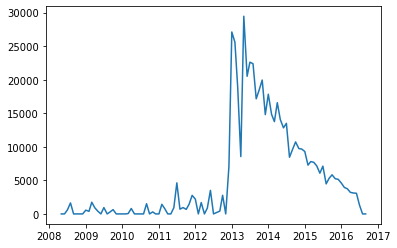

In [21]:
plt.plot(df1['BORE_OIL_VOL'])

Cut irrelevant time period

In [22]:
df1= df1[df1.index >= '2013-05-01'].copy()

Plot series

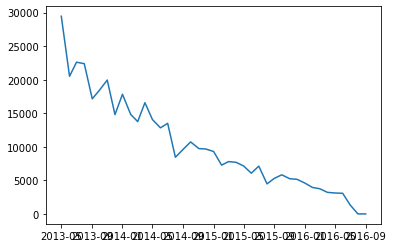

In [23]:
plt.plot(df1['BORE_OIL_VOL'])

Plot autocorrelation function

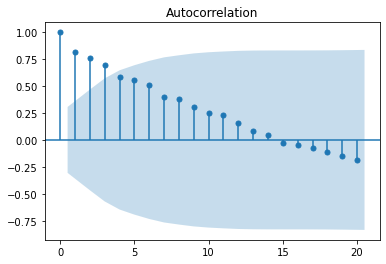

In [24]:
plot_acf(df1['BORE_OIL_VOL'], lags= 20, alpha=0.05);

Test for stationarity

In [25]:
adfuller(df1['BORE_OIL_VOL'])

(-1.2128996919559085,
 0.6680221195757312,
 6,
 34,
 {'1%': -3.639224104416853,
  '5%': -2.9512301791166293,
  '10%': -2.614446989619377},
 501.6868103753105)

Time Series is not stationary

Take 1st difference 

In [26]:
adfuller(df1['BORE_OIL_VOL'].diff().dropna())

(-2.2421572375746286,
 0.1913019841543785,
 5,
 34,
 {'1%': -3.639224104416853,
  '5%': -2.9512301791166293,
  '10%': -2.614446989619377},
 485.01935883469275)

Time series is still not stationary

Take 2nd difference

In [27]:
adfuller(df1['BORE_OIL_VOL'].diff().diff().dropna())

(-3.3607947556963027,
 0.01237022929481263,
 10,
 28,
 {'1%': -3.6889256286443146,
  '5%': -2.9719894897959187,
  '10%': -2.6252957653061224},
 469.56869403569675)

Time series is now  stationary after second differencing

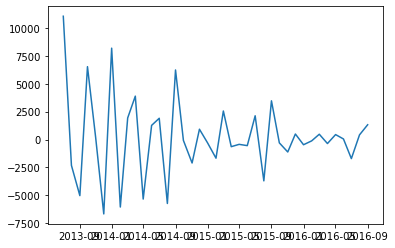

In [28]:
plt.plot(df1['BORE_OIL_VOL'].diff().diff().dropna())

Autoregressive model

In [29]:
AR_model1 = ARIMA(df1['BORE_OIL_VOL'], order=(4,2,0))

In [30]:
results = AR_model1.fit()

In [31]:
print(results.summary())

                             ARIMA Model Results                              
Dep. Variable:        D2.BORE_OIL_VOL   No. Observations:                   39
Model:                 ARIMA(4, 2, 0)   Log Likelihood                -344.281
Method:                       css-mle   S.D. of innovations           1569.673
Date:                Thu, 10 Feb 2022   AIC                            700.562
Time:                        23:21:09   BIC                            710.543
Sample:                    07-01-2013   HQIC                           704.143
                         - 09-01-2016                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    26.9275     74.165      0.363      0.717    -118.434     172.289
ar.L1.D2.BORE_OIL_VOL    -1.3437      0.172     -7.794      0.000      -1.682      -1.006
ar.L2.D2

In [32]:
print(results.params)

const                    26.927474
ar.L1.D2.BORE_OIL_VOL    -1.343730
ar.L2.D2.BORE_OIL_VOL    -1.078062
ar.L3.D2.BORE_OIL_VOL    -0.132018
ar.L4.D2.BORE_OIL_VOL     0.062050
dtype: float64


Choosing Best AR model

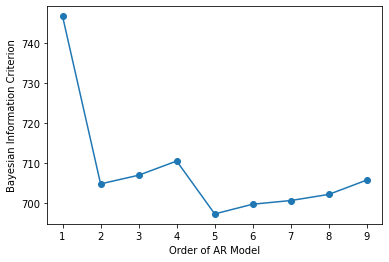

In [33]:
BIC = np.zeros(10)
for p in range(10):
    mod = ARIMA(df1['BORE_OIL_VOL'], order=(p,2,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
plt.plot(range(1,10), BIC[1:10], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

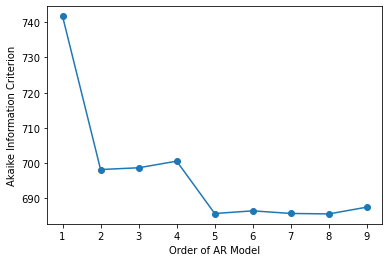

In [34]:
AIC = np.zeros(10)
for p in range(10):
    mod = ARIMA(df1['BORE_OIL_VOL'], order=(p,2,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.aic
    
# Plot the aiC as a function of p
plt.plot(range(1,10), BIC[1:10], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Akaike Information Criterion')
plt.show()

5th order autoregressive model is the best AR model as per the Bayesian Information Criterion and Akaike Information Criterion.

Moving average model

In [35]:
MA_model1 = ARIMA(df1['BORE_OIL_VOL'], order=(0,2,4))

In [36]:
results = MA_model1.fit()

In [37]:
print(results.summary())

                             ARIMA Model Results                              
Dep. Variable:        D2.BORE_OIL_VOL   No. Observations:                   39
Model:                 ARIMA(0, 2, 4)   Log Likelihood                -343.478
Method:                       css-mle   S.D. of innovations           1318.451
Date:                Thu, 10 Feb 2022   AIC                            698.957
Time:                        23:21:29   BIC                            708.938
Sample:                    07-01-2013   HQIC                           702.538
                         - 09-01-2016                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    18.6181      4.787      3.889      0.000       9.235      28.001
ma.L1.D2.BORE_OIL_VOL    -2.2272      0.320     -6.964      0.000      -2.854      -1.600
ma.L2.D2

In [38]:
print(results.params)

const                    18.618084
ma.L1.D2.BORE_OIL_VOL    -2.227153
ma.L2.D2.BORE_OIL_VOL     2.457951
ma.L3.D2.BORE_OIL_VOL    -2.226583
ma.L4.D2.BORE_OIL_VOL     0.999372
dtype: float64


Choosing Best MA model

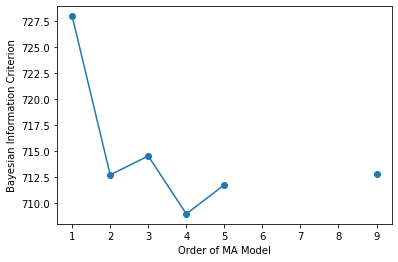

In [39]:
BIC = np.zeros(10)
for p in range(10):
    mod = ARIMA(df1['BORE_OIL_VOL'], order=(0,2,p))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
plt.plot(range(1,10), BIC[1:10], marker='o')
plt.xlabel('Order of MA Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

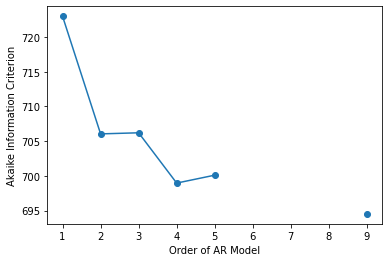

In [40]:
AIC = np.zeros(10)
for p in range(10):
    mod = ARIMA(df1['BORE_OIL_VOL'], order=(0,2,p))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.aic
    
# Plot the aiC as a function of p
plt.plot(range(1,10), BIC[1:10], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Akaike Information Criterion')
plt.show()

4th order moving average model is the best MA model as per the Bayesian Information Criterion and Akaike Information Criterion.

ARIMA model

In [41]:
ARIMA_model1 = ARIMA(df1['BORE_OIL_VOL'], order=(4,2,4))

In [42]:
results = ARIMA_model1.fit()

In [43]:
print(results.summary())

                             ARIMA Model Results                              
Dep. Variable:        D2.BORE_OIL_VOL   No. Observations:                   39
Model:                 ARIMA(4, 2, 4)   Log Likelihood                -372.857
Method:                       css-mle   S.D. of innovations                nan
Date:                Thu, 10 Feb 2022   AIC                            765.714
Time:                        23:21:49   BIC                            782.350
Sample:                    07-01-2013   HQIC                           771.683
                         - 09-01-2016                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   228.9729        nan        nan        nan         nan         nan
ar.L1.D2.BORE_OIL_VOL    -0.6308   5.41e-06  -1.17e+05      0.000      -0.631      -0.631
ar.L2.D2

Choosing the best ARIMA model

In [44]:
order_aic_bic=[]

# Loop over p values from 0-6
for p in range(7):
  # Loop over q values from 0-6
    for q in range(7):
      	# create and fit ARMA(p,q) model
        try:
            model = ARIMA(df1['BORE_OIL_VOL'], order=(p,2,q))
            results = model.fit()
            order_aic_bic.append((p,q,results.aic, results.bic))
            print(p,q,results.aic, results.bic)
        except:
            print(p,q,None,None)

0 0 754.3506015262873 757.6777248185466
0 1 722.9791063559439 727.9697912943329
0 2 706.0402000108181 712.6944465953367
0 3 706.1980734956272 714.5158817262754
0 4 698.9568829837756 708.9382528605535
0 5 700.0967703098361 711.7417018327436
0 6 nan nan
1 0 741.7146014455318 746.7052863839208
1 1 713.5876234924943 720.2418700770129
1 2 706.8804934424928 715.198301673141
1 3 709.6654222583146 719.6467921350925
1 4 None None
1 5 None None
1 6 None None
2 0 698.1842482826179 704.8384948671364
2 1 697.3098916388154 705.6276998694636
2 2 696.397827356968 706.3791972337459
2 3 698.8048284632644 710.4497599861719
2 4 None None
2 5 None None
2 6 689.592674313795 706.2282907750914
3 0 698.6872474353 707.0050556659482
3 1 710.7959773354224 720.7773472122003
3 2 None None
3 3 None None
3 4 699.6626658192773 714.6347206344442
3 5 None None
3 6 None None
4 0 700.5618995303892 710.543269407167
4 1 None None
4 2 717.0632884939164 730.3717816629536
4 3 None None
4 4 765.7143117702253 782.3499282315217
4

In [45]:
order_aic_bic_ordered = sorted(order_aic_bic,key=itemgetter(2))

In [46]:
order_aic_bic_ordered

[(5, 1, 685.5611947125597, 698.8696878815969),
 (5, 0, 685.6949713682225, 697.33990289113),
 (6, 0, 686.4585226776517, 699.7670158466889),
 (2, 6, 689.592674313795, 706.2282907750914),
 (2, 2, 696.397827356968, 706.3791972337459),
 (2, 1, 697.3098916388154, 705.6276998694636),
 (2, 0, 698.1842482826179, 704.8384948671364),
 (3, 0, 698.6872474353, 707.0050556659482),
 (2, 3, 698.8048284632644, 710.4497599861719),
 (0, 4, 698.9568829837756, 708.9382528605535),
 (3, 4, 699.6626658192773, 714.6347206344442),
 (0, 5, 700.0967703098361, 711.7417018327436),
 (4, 0, 700.5618995303892, 710.543269407167),
 (5, 2, 700.7941987443465, 715.7662535595134),
 (0, 2, 706.0402000108181, 712.6944465953367),
 (0, 3, 706.1980734956272, 714.5158817262754),
 (1, 2, 706.8804934424928, 715.198301673141),
 (1, 3, 709.6654222583146, 719.6467921350925),
 (3, 1, 710.7959773354224, 720.7773472122003),
 (1, 1, 713.5876234924943, 720.2418700770129),
 (6, 6, 715.7672275885757, 739.0570906343908),
 (6, 4, 716.0103442315

The best ARIMA model is with p = 5, d = 2, q = 1

ARIMAX

In [47]:
model = SARIMAX(df1['BORE_OIL_VOL'], order=(5,2,1),exog=df1[['AVG_DOWNHOLE_PRESSURE','AVG_DP_TUBING','AVG_ANNULUS_PRESS','AVG_CHOKE_SIZE_P','AVG_WHP_P','AVG_WHT_P','DP_CHOKE_SIZE','BORE_WAT_VOL']])
results = model.fit() 
print(0,3,results.aic, results.bic)

0 3 724.0545266854215 749.0079513773662


Comparing the BIC of the ARIMAX model vs the best  ARIMA model we can see that they are similar but the best ARIMA model still performed better.

Choosing the best ARIMAX model

In [48]:
order_aic_bic=[]

# Loop over p values from 0-6
for p in range(7):
  # Loop over q values from 0-6
    for q in range(7):
      	# create and fit ARMA(p,q) model
        try:
            model = SARIMAX(df1['BORE_OIL_VOL'], order=(p,2,q),exog=df1[['AVG_DOWNHOLE_PRESSURE','AVG_DP_TUBING','AVG_ANNULUS_PRESS','AVG_CHOKE_SIZE_P','AVG_WHP_P','AVG_WHT_P','DP_CHOKE_SIZE','BORE_WAT_VOL']])
            results = model.fit() 
            order_aic_bic.append((p,q,results.aic, results.bic))
            print(p,q,results.aic, results.bic)
        except:
            print(p,q,None,None)

0 0 732.0019636307626 746.9740184459295
0 1 709.2251306066246 725.860747067921
0 2 712.5334787652505 730.8326568726766
0 3 714.3686205467388 734.3313603002946
0 4 715.2800194863635 736.9063208860489
0 5 717.9097372568473 741.1996003026624
0 6 717.4995897284276 742.4530144203724
1 0 710.4925394578856 727.1281559191821
1 1 713.0787178200576 731.3778959274837
1 2 715.1741778473661 735.1369176009218
1 3 716.4218436531299 738.0481450528154
1 4 723.5651675568936 746.8550306027087
1 5 724.6365144525539 749.5899391444987
1 6 729.0971400456781 755.7141263837524
2 0 712.2020531175734 730.5012312249995
2 1 714.3558508260787 734.3185905796345
2 2 722.5980467204763 744.2243481201617
2 3 723.8410438130003 747.1309068588154
2 4 721.6934228818847 746.6468475738294
2 5 718.2294894793826 744.8464758174568
2 6 726.0045871006406 754.2851350848446
3 0 713.6104588990595 733.5731986526152
3 1 718.8925885385893 740.5188899382747
3 2 725.493722283039 748.7835853288541
3 3 725.6049285724771 750.5583532644218
3 

The best ARIMA model still performed better than the ARIMAX model.

Best Model

In [49]:
model = SARIMAX(df1['BORE_OIL_VOL'], order=(5,2,1))
results = model.fit()

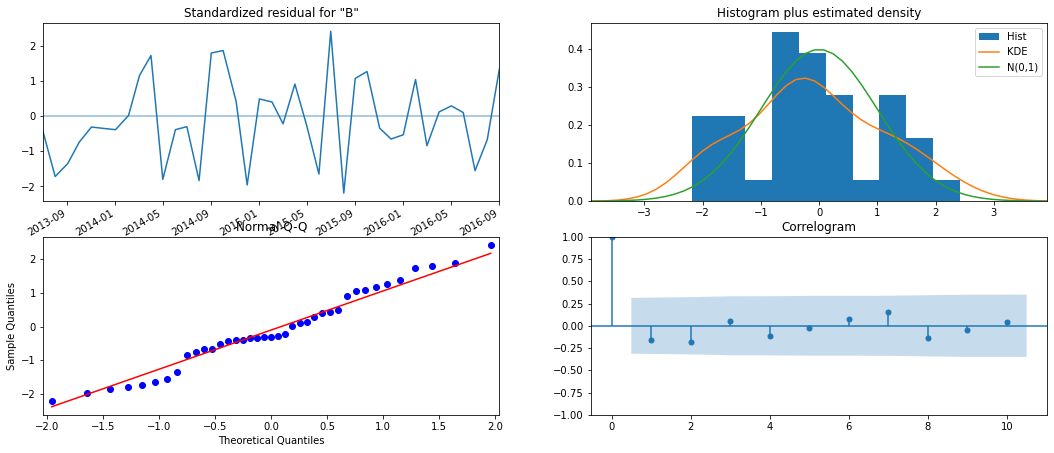

In [50]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

In [51]:
df1.head(1)

,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,NPD_WELL_BORE_NAME,AVG_DOWNHOLE_PRESSURE.shifted3,AVG_DOWNHOLE_TEMPERATURE.shifted3,AVG_DP_TUBING.shifted3,AVG_ANNULUS_PRESS.shifted3,AVG_CHOKE_SIZE_P.shifted3,AVG_WHP_P.shifted3,AVG_WHT_P.shifted3,DP_CHOKE_SIZE.shifted3,BORE_OIL_VOL.shifted3,BORE_GAS_VOL.shifted3,BORE_WAT_VOL.shifted3,BORE_WI_VOL.shifted3
DATEPRD,,,,,,,,,,,,,,,,,,,,,,,,,
2013-05-01,238.948909,98.773576,206.431758,22.316697,97.851758,32.517212,87.785394,3.544788,29455.0,0.0,0.0,0.0,15/9-F-14,242.421357,101.094214,209.964714,22.047036,96.248736,32.456643,87.408179,3.390214,25589.0,0.0,0.0,0.0


One-step ahead prediction

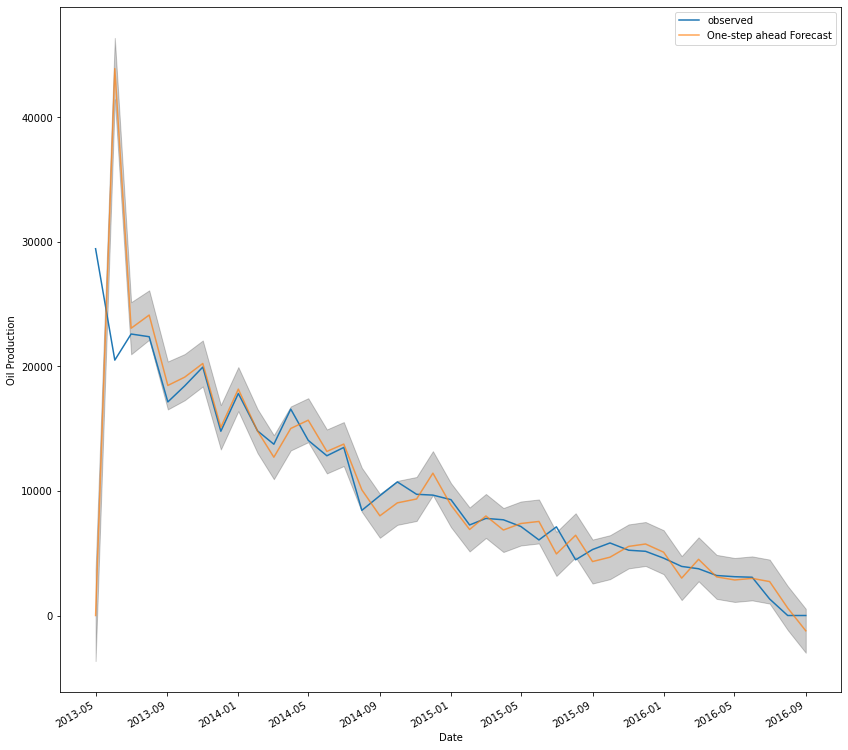

In [52]:
pred = results.get_prediction(start=pd.to_datetime('2013-05-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = df1['BORE_OIL_VOL']['2011':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 14))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Oil Production')
plt.legend()
plt.show()

In [53]:
y_forecasted = pred.predicted_mean
y_truth =  df1['BORE_OIL_VOL']['2011':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is 35594773.79
The Root Mean Squared Error is 5966.14


In [54]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:           BORE_OIL_VOL   No. Observations:                   41
Model:               SARIMAX(5, 2, 1)   Log Likelihood                -327.939
Date:                Thu, 10 Feb 2022   AIC                            669.878
Time:                        23:22:45   BIC                            681.523
Sample:                    05-01-2013   HQIC                           674.056
                         - 09-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0818      0.100    -10.839      0.000      -1.277      -0.886
ar.L2         -0.5081      0.106     -4.811      0.000      -0.715      -0.301
ar.L3         -0.1804      0.112     -1.609      0.1

Auto-ARIMA

In [70]:
model = pm.auto_arima(df1['BORE_OIL_VOL'],start_p=0,start_q=0, max_p=10,max_q=10,test='adf',d=2,error_action='ignore',max_order=20,suppress_warnings=True,stepwise=False, trace=True)

 ARIMA(0,2,0)(0,0,0)[1]             : AIC=752.505, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[1]             : AIC=721.947, Time=0.02 sec
 ARIMA(0,2,2)(0,0,0)[1]             : AIC=723.212, Time=0.04 sec
 ARIMA(0,2,3)(0,0,0)[1]             : AIC=724.258, Time=0.10 sec
 ARIMA(0,2,4)(0,0,0)[1]             : AIC=712.286, Time=0.15 sec
 ARIMA(0,2,5)(0,0,0)[1]             : AIC=712.379, Time=0.18 sec
 ARIMA(0,2,6)(0,0,0)[1]             : AIC=713.002, Time=0.19 sec
 ARIMA(0,2,7)(0,0,0)[1]             : AIC=inf, Time=0.20 sec
 ARIMA(0,2,8)(0,0,0)[1]             : AIC=695.828, Time=0.13 sec
 ARIMA(0,2,9)(0,0,0)[1]             : AIC=inf, Time=0.40 sec
 ARIMA(0,2,10)(0,0,0)[1]             : AIC=nan, Time=0.18 sec
 ARIMA(1,2,0)(0,0,0)[1]             : AIC=730.346, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[1]             : AIC=723.648, Time=0.04 sec
 ARIMA(1,2,2)(0,0,0)[1]             : AIC=728.040, Time=0.05 sec
 ARIMA(1,2,3)(0,0,0)[1]             : AIC=723.324, Time=0.20 sec
 ARIMA(1,2,4)(0,0,0)[1]             

The best Auto-ARIMA model is with p=10 , d = 2 and q = 6 which has a lower AIC than the best ARIMA model (but higher BIC).

In [68]:
model = SARIMAX(df1['BORE_OIL_VOL'], order=(10,2,6))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:           BORE_OIL_VOL   No. Observations:                   41
Model:              SARIMAX(10, 2, 6)   Log Likelihood                -314.149
Date:                Fri, 11 Feb 2022   AIC                            662.298
Time:                        10:48:39   BIC                            690.578
Sample:                    05-01-2013   HQIC                           672.445
                         - 09-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8301      0.167     -4.981      0.000      -1.157      -0.503
ar.L2         -0.6084      0.175     -3.468      0.001      -0.952      -0.265
ar.L3         -0.3098      0.202     -1.537      0.1

Auto-ARIMA with Exogeneous variable

In [72]:
EX= pd.DataFrame(df1[['AVG_DOWNHOLE_PRESSURE','AVG_DP_TUBING','AVG_ANNULUS_PRESS','AVG_CHOKE_SIZE_P','AVG_WHP_P','AVG_WHT_P','DP_CHOKE_SIZE','BORE_WAT_VOL']]).to_numpy()
            

Create exogeneous variable array for the Auto-ARIMA

In [75]:
EX

array([[2.38948909e+02, 2.06431758e+02, 2.23166970e+01, 9.78517582e+01,
        3.25172121e+01, 8.77853939e+01, 3.54478788e+00, 0.00000000e+00],
       [2.44634654e+02, 2.11459578e+02, 2.04714990e+01, 8.47956729e+01,
        3.32542215e+01, 8.73353238e+01, 4.52869680e+00, 3.85000000e+02],
       [2.46633774e+02, 2.13343290e+02, 2.11968710e+01, 8.68140548e+01,
        3.32902903e+01, 8.75882581e+01, 4.64109677e+00, 9.39000000e+02],
       [2.49855156e+02, 2.19373250e+02, 2.05943438e+01, 9.15233034e+01,
        3.04817500e+01, 8.38328125e+01, 3.21525000e+00, 0.00000000e+00],
       [2.34918505e+02, 2.03520106e+02, 2.07842064e+01, 8.23762403e+01,
        3.36601242e+01, 8.66357253e+01, 4.66616397e+00, 3.09000000e+02],
       [2.53730355e+02, 2.22704387e+02, 2.04549032e+01, 8.62951965e+01,
        3.10260323e+01, 8.23090000e+01, 3.76393548e+00, 1.22700000e+03],
       [2.51022871e+02, 2.18119161e+02, 2.08587097e+01, 9.35854732e+01,
        3.29037419e+01, 8.69091935e+01, 3.50474194e+00, 9.

In [74]:
model = pm.auto_arima(y=df1['BORE_OIL_VOL'],start_p=0,start_q=0, max_p=10,max_q=10,test='adf',d=2,error_action='ignore',max_order=20,suppress_warnings=True,stepwise=False, trace=True,X=EX )

 ARIMA(0,2,0)(0,0,0)[1]             : AIC=732.002, Time=0.20 sec
 ARIMA(0,2,1)(0,0,0)[1]             : AIC=709.225, Time=0.30 sec
 ARIMA(0,2,2)(0,0,0)[1]             : AIC=712.533, Time=0.36 sec
 ARIMA(0,2,3)(0,0,0)[1]             : AIC=714.369, Time=0.32 sec
 ARIMA(0,2,4)(0,0,0)[1]             : AIC=715.280, Time=0.47 sec
 ARIMA(0,2,5)(0,0,0)[1]             : AIC=717.910, Time=0.46 sec
 ARIMA(0,2,6)(0,0,0)[1]             : AIC=717.500, Time=0.38 sec
 ARIMA(0,2,7)(0,0,0)[1]             : AIC=721.130, Time=0.49 sec
 ARIMA(0,2,8)(0,0,0)[1]             : AIC=724.079, Time=0.54 sec
 ARIMA(0,2,9)(0,0,0)[1]             : AIC=inf, Time=0.71 sec
 ARIMA(0,2,10)(0,0,0)[1]             : AIC=nan, Time=0.29 sec
 ARIMA(1,2,0)(0,0,0)[1]             : AIC=710.493, Time=0.32 sec
 ARIMA(1,2,1)(0,0,0)[1]             : AIC=713.079, Time=0.31 sec
 ARIMA(1,2,2)(0,0,0)[1]             : AIC=715.174, Time=0.33 sec
 ARIMA(1,2,3)(0,0,0)[1]             : AIC=716.422, Time=0.40 sec
 ARIMA(1,2,4)(0,0,0)[1]         

The best  ARIMA (p=5, d=2, q=1) is still the best model even though the best Auto-ARIma model has a slightly lower AIC since it is  simpler model. 